In [53]:
# Group7 Project 2
# Hierarchical Clustering in 2 levels
# for Usage and understanding, refer the Report of this project
# Members:-
# me19b005
# me19b110
# me19b127
# me19b84
# me19b130
# me19b028

In [52]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

In [54]:
#from google.colab import drive
#drive.mount('/content/drive')   
# uncomment the above line in case of importing from google collab

In [55]:
train_data=pd.read_csv('/content/drive/My Drive/Proj2_Test_Data.csv') # name the test file as Proj2_Test_Data.csv in proper location
train_data

,date,Before Translation,Review,Author,Location,Before Pronoun Resolution,Brand,Number of Ratings,Price,Product Rating,Review Count,Review Rating,Review Title,Root,SKU,Source,Aspect,Context Aspect,Sentence,Combined Max Score,Overall Sentiment,Sentiment Score,Sentiment Confidence,Clustering Confidence,Context Aspect Group,Aspect Sentiment,Aspect Sentiment Score,Context Aspect Sentiment,Context Aspect Sentiment Score,Context Aspect Group Sentiment,Context Aspect Group Sentiment Score
0,2021-05-23 00:00:00+00:00,NaN,Very damaging to heart and kidneys. It helps w...,Caroline B. De Bruyn,US,NaN,Voltaren,NaN,$29.99,4.5,NaN,1,NaN,https://www.amazon.com/Voltaren-Topical-Arthri...,Voltaren Arthritis Pain Gel for Topical Arthri...,Amazon,pain and spasm types,arthritis pain,it helps with arthritis pain for a short perio...,100.0000,Positive,0.8,high,high,degenerative arthritis,Positive,0.8,Positive,0.8,Positive,0.8
1,2021-05-23 00:00:00+00:00,NaN,Very damaging to heart and kidneys. It helps w...,Caroline B. De Bruyn,US,NaN,Voltaren,NaN,$29.99,4.5,NaN,1,NaN,https://www.amazon.com/Voltaren-Topical-Arthri...,Voltaren Arthritis Pain Gel for Topical Arthri...,Amazon,size,short period,it helps with arthritis pain for a short perio...,100.0000,Positive,0.8,high,high,short period,Positive,0.8,Positive,0.8,Positive,0.8
2,2021-05-24 00:00:00+00:00,NaN,works quite well for neck and shoulder pain du...,Lynne Byrne,US,NaN,Voltaren,NaN,$29.99,4.5,NaN,5,NaN,https://www.amazon.com/Voltaren-Topical-Arthri...,Voltaren Arthritis Pain Gel for Topical Arthri...,Amazon,pain and spasm types,arthritis pain,works quite well for neck and shoulder pain du...,95.1807,Positive,0.9,high,high,degenerative arthritis,Positive,0.9,Positive,0.9,Positive,0.9
3,2021-05-24 00:00:00+00:00,NaN,works quite well for neck and shoulder pain du...,Lynne Byrne,US,NaN,Voltaren,NaN,$29.99,4.5,NaN,5,NaN,https://www.amazon.com/Voltaren-Topical-Arthri...,Voltaren Arthritis Pain Gel for Topical Arthri...,Amazon,pain and spasm types,shoulder pain,works quite well for neck and shoulder pain du...,100.0000,Positive,0.9,high,high,pains shoulder,Positive,0.9,Positive,0.9,Positive,0.9
4,2021-05-24 00:00:00+00:00,NaN,works quite well for neck and shoulder pain du...,Lynne Byrne,US,NaN,Voltaren,NaN,$29.99,4.5,NaN,5,NaN,https://www.amazon.com/Voltaren-Topical-Arthri...,Voltaren Arthritis Pain Gel for Topical Arthri...,Amazon,smell,smell strong,the smell is not as strong as many of the drug...,100.0000,Negative,-0.4,high,high,strongly smells,Negative,-0.4,Negative,-0.4,Negative,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2020-05-26 00:00:00+00:00,NaN,This product helps to reduce the osteoarthriti...,BRANDEE74,US,NaN,Voltaren,528 ratings,$17.97,4.4,528 reviews,5,Looks great,https://www.walmart.com/reviews/product/556463...,Voltaren Topical Arthritis Medicine Gel for Ar...,Walmart,effectiveness,product helpful,this product helps to reduce the osteoarthriti...,90.5130,Positive,0.9,high,high,great product help,Positive,0.9,Positive,0.9,Positive,0.9
1996,2020-05-26 00:00:00+00:00,NaN,This product helps to reduce the osteoarthriti...,BRANDEE74,US,NaN,Voltaren,279,$27.99,4.5,NaN,5,NaN,https://www.cvs.com/shop/voltaren-topical-arth...,Voltaren Topical Arthritis Pain Relief Gel,CVS,recommendation,highly recommend,i highly recommend this product to anyone who ...,100.0000,Positive,0.9,high,high,highly recommend,Positive,0.9,Positive,0.9,Positive,0.9
1997,2020-05-26 00:00:00+00:00,NaN,This product helps to reduce the osteoarthriti...,BRANDEE74,US,NaN,Voltaren,1028 ratings,$9.97,4.4,NaN,5,Looks great,https://www.walmart.com/reviews/product/637717...,Voltaren Topical Arthritis Medicine Gel for Ar...,Walmart,recommendation,highly recommend,i highly recommend this product to anyone who ...,100.0000,Positive,0.9,high,high,highly recommend,Positive,0.9,Positive,0.9,Positive,0.9
1998,2020-05-26 00:00:00+00:00,NaN,This produ

In [14]:
df=train_data[['date','Author','Aspect','Context Aspect']]
#print(df)

In [37]:
print(len(df))

2000


In [23]:
import nltk
nltk.download('stopwords') # need to download 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [ ]:
# Level 2 implementation starts

In [60]:
def loop_layer_1(df_layer2):
  
  df=df_layer2
  wpt = nltk.WordPunctTokenizer()
  stop_words = nltk.corpus.stopwords.words('english')
  corpus=[]
  for i in df['Aspect']:
    corpus.append(i)
  
  corpus = np.array(corpus)
  norm_corpus = normalize_corpus(corpus)
  ''' cv = CountVectorizer(min_df=0., max_df=1.)
  cv_matrix = cv.fit_transform(norm_corpus)
  cv_matrix = cv_matrix.toarray()
  vocab = cv.get_feature_names_out()''' 
  # following above is Countvectorizer
  # show document feature vectors
  tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
  tv_matrix = tv.fit_transform(norm_corpus)
  tv_matrix = tv_matrix.toarray()

  vocab = tv.get_feature_names()
  similarity_matrix = cosine_similarity(tv_matrix)
  similarity_df = pd.DataFrame(similarity_matrix)
  Z = linkage(similarity_matrix, 'ward')

  # uncomment if want to see the dendograms
  plt.figure(figsize=(50, 20))
  plt.title('Hierarchical Clustering Dendrogram')
  plt.xlabel('Data point')
  plt.ylabel('Distance')
  dendrogram(Z)
  plt.axhline(y=35.0, c='k', ls='--', lw=0.5)

  max_dist = 35.0 # look at dendogram an decide how many clusters u want and then decide the max-dist value 

  cluster_labels = fcluster(Z, max_dist, criterion='distance')

  df['Layer1_ClusterLabel']=cluster_labels
  df.to_csv(r'/content/drive/My Drive/layer1_data_new.csv',index = False, header=True)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


2000
###########


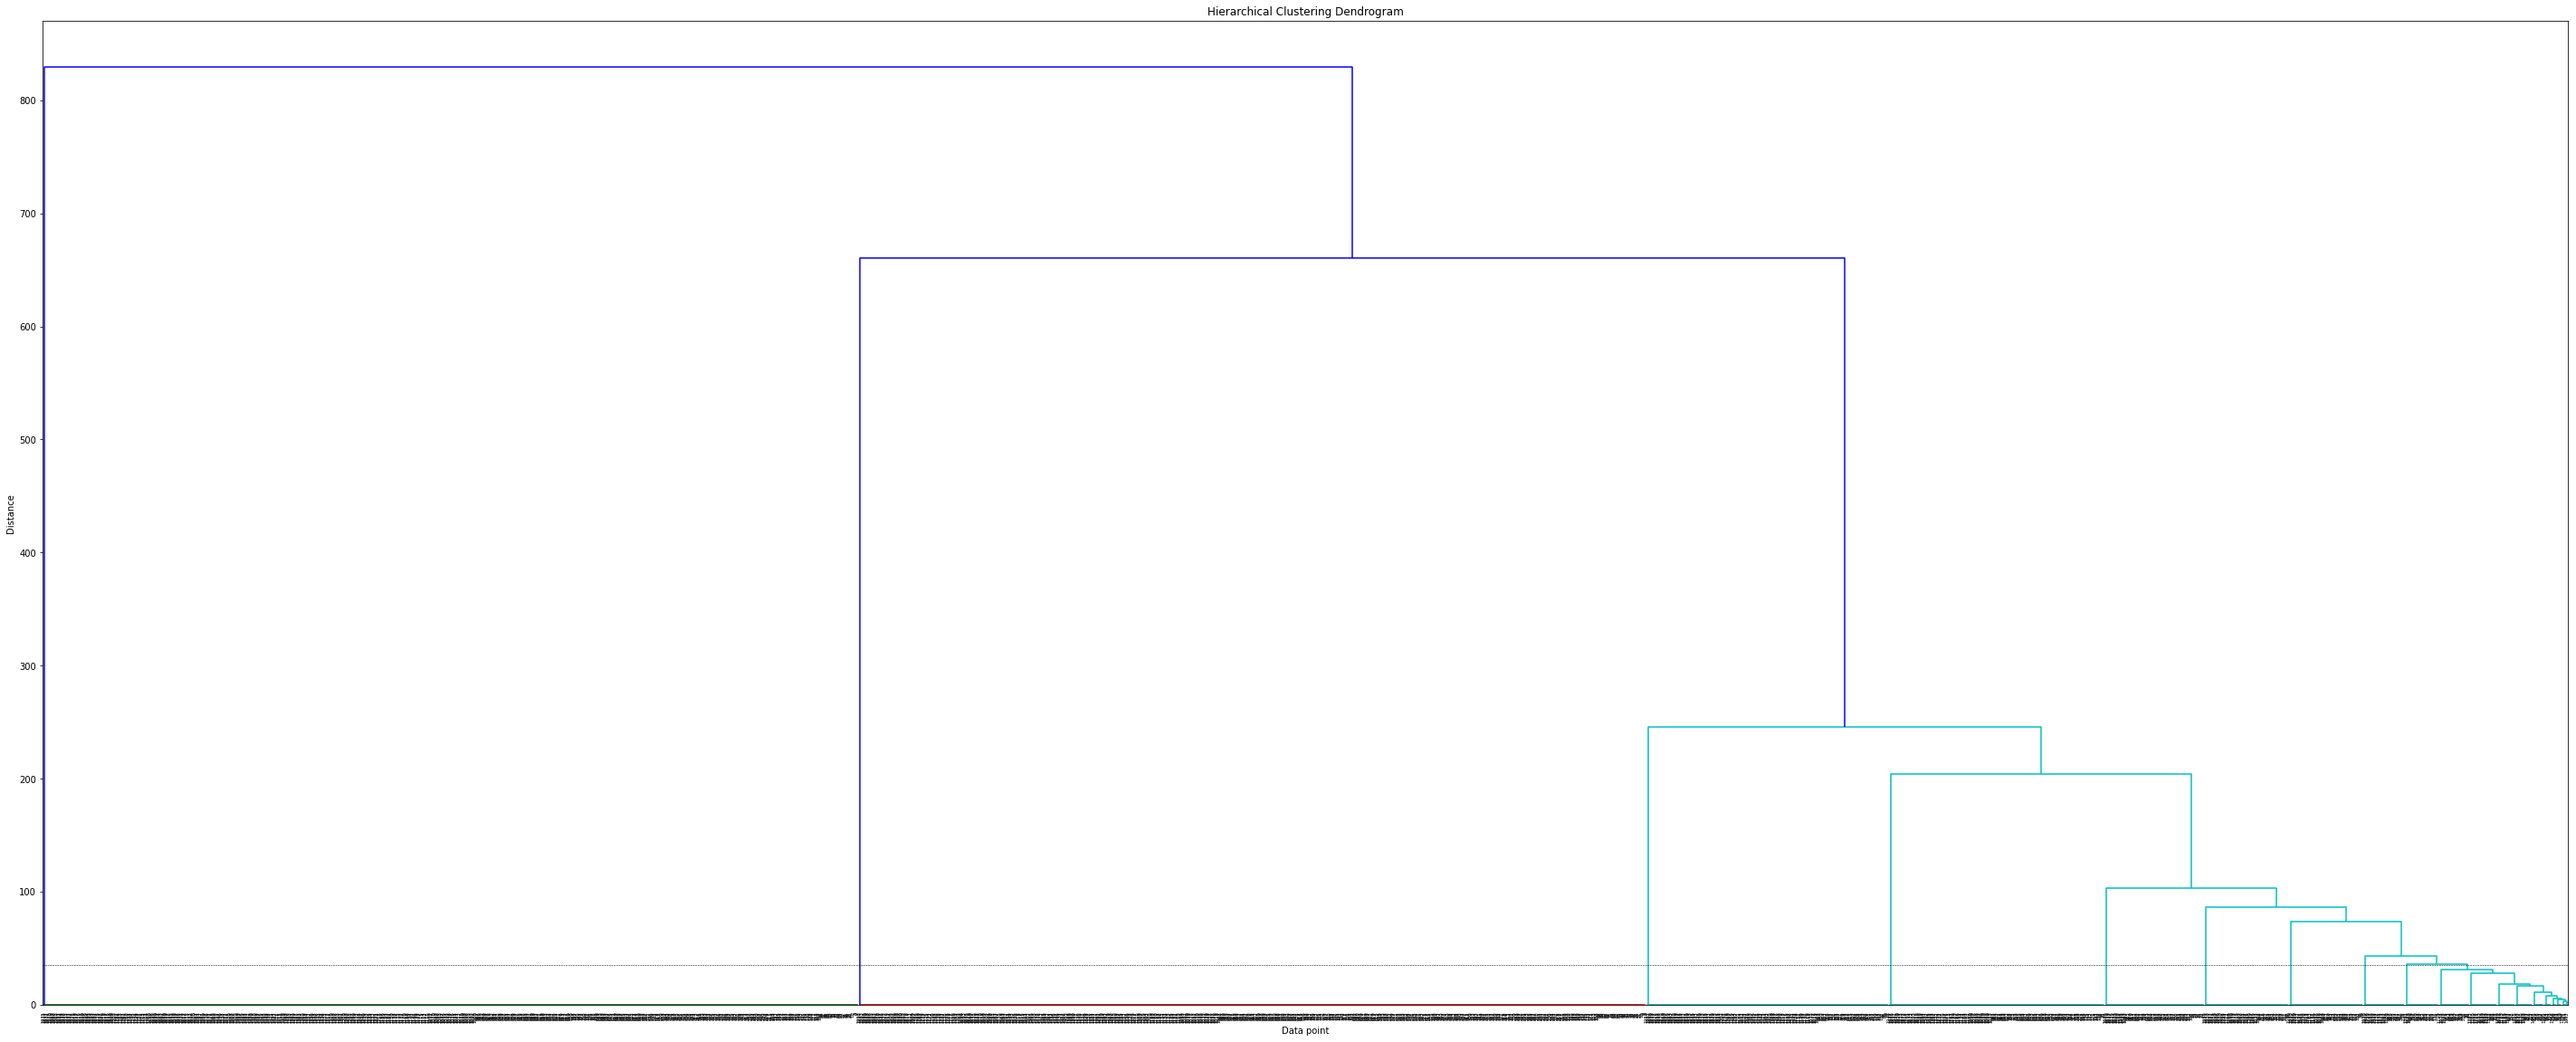

In [61]:
loop_layer_1(df)
print(len(df))
print("###########")

In [ ]:
# Level 2 implementations Start

In [40]:
df_1=df[df.Layer1_ClusterLabel==1]
df_2=df[df.Layer1_ClusterLabel==2]
df_3=df[df.Layer1_ClusterLabel==3]
df_4=df[df.Layer1_ClusterLabel==4]
df_5=df[df.Layer1_ClusterLabel==5]
df_6=df[df.Layer1_ClusterLabel==6]
df_7=df[df.Layer1_ClusterLabel==7]
df_8=df[df.Layer1_ClusterLabel==8]
df_9=df[df.Layer1_ClusterLabel==9]
df_10=df[df.Layer1_ClusterLabel==10]

In [44]:
print(len(df_4))

171


In [45]:
def loop_layer_2(df_layer2,n):
  #print(n)
  df=df_layer2
  wpt = nltk.WordPunctTokenizer()
  stop_words = nltk.corpus.stopwords.words('english')
  corpus=[]
  for i in df['Context Aspect']:
    corpus.append(i)
  
  corpus = np.array(corpus)
  norm_corpus = normalize_corpus(corpus)
  cv = CountVectorizer(min_df=0., max_df=1.)
  cv_matrix = cv.fit_transform(norm_corpus)
  cv_matrix = cv_matrix.toarray()
  vocab = cv.get_feature_names_out()
  # show document feature vectors
  tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
  tv_matrix = tv.fit_transform(norm_corpus)
  tv_matrix = tv_matrix.toarray()

  vocab = tv.get_feature_names()
  similarity_matrix = cosine_similarity(tv_matrix)
  similarity_df = pd.DataFrame(similarity_matrix)
  Z = linkage(similarity_matrix, 'ward')

  #plt.figure(figsize=(80, 30))
  #plt.title('Hierarchical Clustering Dendrogram')
  #plt.xlabel('Data point')
  #plt.ylabel('Distance')
  #dendrogram(Z)
  #plt.axhline(y=35.0, c='k', ls='--', lw=0.5)

  max_dist = 20.0 # look at dendogram an decide how many clusters u want and then decide the max-dist value 

  cluster_labels = fcluster(Z, max_dist, criterion='distance')

  df['Layer2_ClusterLabel']=cluster_labels
  #df.to_csv(r'/content/drive/My Drive/layer_'+str(n)+'_data_new.csv',index = False, header=True)
  # uncomment the above line to get csv file for each layer 2 cluster


In [46]:
loop_layer_2(df_1,1)
loop_layer_2(df_2,2)
loop_layer_2(df_3,3)
loop_layer_2(df_4,4)
loop_layer_2(df_5,5)
loop_layer_2(df_6,6)
loop_layer_2(df_7,7)
loop_layer_2(df_8,8)
loop_layer_2(df_9,9)
loop_layer_2(df_10,10)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyW

In [47]:
df_1=df_1.append(df_2)
df_1=df_1.append(df_3)
df_1=df_1.append(df_4)
df_1=df_1.append(df_5)
df_1=df_1.append(df_6)
df_1=df_1.append(df_7)
df_1=df_1.append(df_8)
df_1=df_1.append(df_9)
df_1=df_1.append(df_10)


In [50]:
Final_df=df_1
Final_df

,date,Author,Aspect,Context Aspect,Layer1_ClusterLabel,Layer2_ClusterLabel
0,2021-05-23 00:00:00+00:00,Caroline B. De Bruyn,pain and spasm types,arthritis pain,1,10
2,2021-05-24 00:00:00+00:00,Lynne Byrne,pain and spasm types,arthritis pain,1,10
3,2021-05-24 00:00:00+00:00,Lynne Byrne,pain and spasm types,shoulder pain,1,3
7,2021-05-24 00:00:00+00:00,Rose Collum,pain and spasm types,instant pain,1,3
11,2021-05-24 00:00:00+00:00,teacherlady04,pain and spasm types,pain level,1,3
...,...,...,...,...,...,...
1781,2020-06-15 00:00:00+00:00,Dan From Jersey,duration of relief,long lasts,10,2
1782,2020-06-15 00:00:00+00:00,Dan From Jersey,duration of relief,long lasts,10,2
1783,2020-06-15 00:00:00+00:00,Dan From Jersey,duration of relief,long lasts,10,2
1789,2020-06-09 00:00:00+00:00,Ana74,effect on sleep,sleep well,10,2


In [51]:
Final_df.to_csv(r'/content/drive/My Drive/Final_Clusters.csv',index = False, header=True)